**Python 3 code for web scraping, data cleaning, and data saving into a CSV file. DueLune shoe brand.** 

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
url_duelune = "https://www.duelunecalzature.com/"
print(url_duelune)

https://www.duelunecalzature.com/


In [6]:
url_duelune_donna = "https://www.duelunecalzature.com/prodotti/donna/"

In [8]:
items = BeautifulSoup(requests.get(url_duelune_donna).text).find_all("div", class_="item")
cat_donna = []

for item in items:
    cat_donna.append(item.text)

print(cat_donna)

['\n\n\nsaldi\n\n', '\n\nSneakers\n\n', '\n\nDécollète\n\n', '\n\nStivali\n\n', '\n\nScarponcini\n\n', '\n\nTronchetti\n\n', '\n\nBallerine\n\n', '\n\nSandali e Slingback\n\n', '\n\nScarpe Basse\n\n']


In [10]:
cat_donna

['\n\n\nsaldi\n\n',
 '\n\nSneakers\n\n',
 '\n\nDécollète\n\n',
 '\n\nStivali\n\n',
 '\n\nScarponcini\n\n',
 '\n\nTronchetti\n\n',
 '\n\nBallerine\n\n',
 '\n\nSandali e Slingback\n\n',
 '\n\nScarpe Basse\n\n']

In [12]:
cat_donna = ['sneakers','decollete','stivali','scarponcini','tronchetti','ballerine','sandali','scarpe-basse']

In [14]:
cat_donna

['sneakers',
 'decollete',
 'stivali',
 'scarponcini',
 'tronchetti',
 'ballerine',
 'sandali',
 'scarpe-basse']

In [16]:
url_duelune_donna = "https://www.duelunecalzature.com/prodotti/uomo/calzature-uomo/"

In [18]:
cat_uomo = ['sneakers','stivaletti','stringate','mocassini-slipon','polacchine','goodyear-welted','doppia-fibbia','sandali']

In [20]:
cat_uomo

['sneakers',
 'stivaletti',
 'stringate',
 'mocassini-slipon',
 'polacchine',
 'goodyear-welted',
 'doppia-fibbia',
 'sandali']

In [22]:
sexx = ["donna","uomo"]

In [24]:
#inizializzo
stringhe = []
prodotti = []
sesso = []
categorie = []
sotto_categorie = []
colori = []
prezzi_fin = []
prezzi_ini = []
contatore = 0

In [26]:
url_base = "https://www.duelunecalzature.com/prodotti/"

In [28]:
url_base + sexx[0] + "/calzature-" + sexx[0] + "/" + cat_donna[0] + "-" + sexx[0] + "/?page=" + str(1)

'https://www.duelunecalzature.com/prodotti/donna/calzature-donna/sneakers-donna/?page=1'

In [30]:
for sex in sexx:
    if sex == "donna":
        cat_sex = cat_donna
        num_max = 6
    else:
        cat_sex = cat_uomo
        num_max = 6
    for cat in cat_sex:
        for i in range(1, num_max):
            url_cat = url_base + sex + "/calzature-" + sex + "/" + cat + "-" + sex + "/?page=" + str(i)
            #print(url_cat)
            testi = BeautifulSoup(requests.get(url_cat).text).find_all("div", class_="product__wrapper fade-in-el")
            for testo in testi:
                #print(testo.text)
                scarpa_soup = BeautifulSoup(requests.get(testo.find("a").get("href")).text)
                titolo = scarpa_soup.find("h1", class_="uppercase roslindale normal-title black")
                titolo = titolo.text
                prodotto = titolo.split()[1]
                categoria = cat
                sotto_categoria = titolo.split()[0]
                colore = titolo.split()[-1]
                print(titolo)
                print("colore:", colore)
                print("categoria:", categoria)
                print("sotto_categoria:", sotto_categoria)
                print("prodotto:", prodotto)

                #find product__price tag
                price_tag = scarpa_soup.find("div", class_="product__price")

                #prezzi
                prezzi_long = price_tag.find_all("span", class_="woocommerce-Price-amount amount")
                if len(prezzi_long) < 2:

                    prezzo_ini = float(prezzi_long[0].find("bdi").text.split()[0].replace(",","."))
                    prezzo_fin = prezzo_ini

                else:
                    prezzo_ini = float(prezzi_long[0].find("bdi").text.split()[0].replace(",","."))
                    prezzo_fin = float(prezzi_long[1].find("bdi").text.split()[0].replace(",","."))
                
                        
                print("original price:", prezzo_ini)
                print("final price:", prezzo_fin)
                print("\n")

                stringhe.append(titolo)
                prodotti.append(prodotto)
                sesso.append(sex)
                categorie.append(categoria)
                sotto_categorie.append(sotto_categoria)
                colori.append(colore)    
                prezzi_fin.append(prezzo_fin)
                prezzi_ini.append(prezzo_ini)
                

Sneakers A039 Nero Verde
colore: Verde
categoria: sneakers
sotto_categoria: Sneakers
prodotto: A039
original price: 99.9
final price: 99.9


Sneakers A042 Nero Verde
colore: Verde
categoria: sneakers
sotto_categoria: Sneakers
prodotto: A042
original price: 79.9
final price: 79.9


Sneakers A047 Wafer
colore: Wafer
categoria: sneakers
sotto_categoria: Sneakers
prodotto: A047
original price: 104.9
final price: 83.9


Sneakers A047 Beige
colore: Beige
categoria: sneakers
sotto_categoria: Sneakers
prodotto: A047
original price: 104.9
final price: 83.9


Sneakers A039 Corallo
colore: Corallo
categoria: sneakers
sotto_categoria: Sneakers
prodotto: A039
original price: 99.9
final price: 99.9


Sneakers A039 Bianco Grigio
colore: Grigio
categoria: sneakers
sotto_categoria: Sneakers
prodotto: A039
original price: 99.9
final price: 99.9


Sneakers A039 Lilla Sabbia
colore: Sabbia
categoria: sneakers
sotto_categoria: Sneakers
prodotto: A039
original price: 99.9
final price: 99.9


Sneakers A039 N

In [34]:
#Check the lenght of strings
print(len(stringhe))
print(len(colori))
print(len(prezzi_ini))   
print(len(prodotti))     

403
403
403
403


In [36]:
#Create a pandas dataframe
duelune_df = pd.DataFrame(
    {"Info": stringhe,
     "Nome": prodotti,
     "Sesso": sesso,
     "Categoria": categorie,
     "Sotto_categoria": sotto_categorie,
     "Colore": colori,
     "Prezzo_finale": prezzi_fin,
     "Prezzo_originale": prezzi_ini}
)

In [38]:
duelune_df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale
0,Sneakers A039 Nero Verde,A039,donna,sneakers,Sneakers,Verde,99.9,99.9
1,Sneakers A042 Nero Verde,A042,donna,sneakers,Sneakers,Verde,79.9,79.9
2,Sneakers A047 Wafer,A047,donna,sneakers,Sneakers,Wafer,83.9,104.9
3,Sneakers A047 Beige,A047,donna,sneakers,Sneakers,Beige,83.9,104.9
4,Sneakers A039 Corallo,A039,donna,sneakers,Sneakers,Corallo,99.9,99.9
...,...,...,...,...,...,...,...,...
398,Sandalo Ciabatta U106 Bianco,Ciabatta,uomo,sandali,Sandalo,Bianco,40.0,59.9
399,Sandalo Ciabatta U104 Nabuck Cuoio,Ciabatta,uomo,sandali,Sandalo,Cuoio,45.0,59.9
400,Sandalo Ciabatta U104 Nabuck Nero,Ciabatta,uomo,sandali,Sandalo,Nero,45.0,59.9
401,Sandalo Ciabatta U117 Grigio,Ciabatta,uomo,sandali,Sandalo,Grigio,45.0,59.9


In [40]:
#I save the raw dataframe
duelune_df.to_csv("duelune.csv", index=None)

In [109]:
#I open the df again
df = pd.read_csv("duelune.csv")

In [111]:
#Calculate the discount from final price and original price 
df["Sconto"] = round(((duelune_df.Prezzo_originale - duelune_df.Prezzo_finale)/duelune_df.Prezzo_originale)*100)

In [113]:
df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto
0,Sneakers A039 Nero Verde,A039,donna,sneakers,Sneakers,Verde,99.9,99.9,0.0
1,Sneakers A042 Nero Verde,A042,donna,sneakers,Sneakers,Verde,79.9,79.9,0.0
2,Sneakers A047 Wafer,A047,donna,sneakers,Sneakers,Wafer,83.9,104.9,20.0
3,Sneakers A047 Beige,A047,donna,sneakers,Sneakers,Beige,83.9,104.9,20.0
4,Sneakers A039 Corallo,A039,donna,sneakers,Sneakers,Corallo,99.9,99.9,0.0
...,...,...,...,...,...,...,...,...,...
398,Sandalo Ciabatta U106 Bianco,Ciabatta,uomo,sandali,Sandalo,Bianco,40.0,59.9,33.0
399,Sandalo Ciabatta U104 Nabuck Cuoio,Ciabatta,uomo,sandali,Sandalo,Cuoio,45.0,59.9,25.0
400,Sandalo Ciabatta U104 Nabuck Nero,Ciabatta,uomo,sandali,Sandalo,Nero,45.0,59.9,25.0
401,Sandalo Ciabatta U117 Grigio,Ciabatta,uomo,sandali,Sandalo,Grigio,45.0,59.9,25.0


In [115]:
#Add company name
df["Azienda"] = "Duelune"

In [117]:
df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
0,Sneakers A039 Nero Verde,A039,donna,sneakers,Sneakers,Verde,99.9,99.9,0.0,Duelune
1,Sneakers A042 Nero Verde,A042,donna,sneakers,Sneakers,Verde,79.9,79.9,0.0,Duelune
2,Sneakers A047 Wafer,A047,donna,sneakers,Sneakers,Wafer,83.9,104.9,20.0,Duelune
3,Sneakers A047 Beige,A047,donna,sneakers,Sneakers,Beige,83.9,104.9,20.0,Duelune
4,Sneakers A039 Corallo,A039,donna,sneakers,Sneakers,Corallo,99.9,99.9,0.0,Duelune
...,...,...,...,...,...,...,...,...,...,...
398,Sandalo Ciabatta U106 Bianco,Ciabatta,uomo,sandali,Sandalo,Bianco,40.0,59.9,33.0,Duelune
399,Sandalo Ciabatta U104 Nabuck Cuoio,Ciabatta,uomo,sandali,Sandalo,Cuoio,45.0,59.9,25.0,Duelune
400,Sandalo Ciabatta U104 Nabuck Nero,Ciabatta,uomo,sandali,Sandalo,Nero,45.0,59.9,25.0,Duelune
401,Sandalo Ciabatta U117 Grigio,Ciabatta,uomo,sandali,Sandalo,Grigio,45.0,59.9,25.0,Duelune


In [119]:
df.Sotto_categoria.value_counts()

Sotto_categoria
Sneakers       104
Sandalo         79
Mocassino       41
Stivale         37
Ballerina       33
Décollétè       30
Stivaletto      27
Stringata       22
Décolletè        7
Slingback        7
Scarponcino      5
Doppia           4
Espadrilla       4
Sneaker          2
Décollète        1
Name: count, dtype: int64

In [121]:
#I rename sub categories
df.Sotto_categoria = df.Sotto_categoria.str.replace("Décollétè","Decollete")
df.Sotto_categoria = df.Sotto_categoria.str.replace("Décollète","Decollete")
df.Sotto_categoria = df.Sotto_categoria.str.replace("Décolletè","Decollete")

In [123]:
df.Sotto_categoria = df.Sotto_categoria.str.lower()

In [125]:
df.Sotto_categoria.value_counts()

Sotto_categoria
sneakers       104
sandalo         79
mocassino       41
decollete       38
stivale         37
ballerina       33
stivaletto      27
stringata       22
slingback        7
scarponcino      5
doppia           4
espadrilla       4
sneaker          2
Name: count, dtype: int64

In [127]:
df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
0,Sneakers A039 Nero Verde,A039,donna,sneakers,sneakers,Verde,99.9,99.9,0.0,Duelune
1,Sneakers A042 Nero Verde,A042,donna,sneakers,sneakers,Verde,79.9,79.9,0.0,Duelune
2,Sneakers A047 Wafer,A047,donna,sneakers,sneakers,Wafer,83.9,104.9,20.0,Duelune
3,Sneakers A047 Beige,A047,donna,sneakers,sneakers,Beige,83.9,104.9,20.0,Duelune
4,Sneakers A039 Corallo,A039,donna,sneakers,sneakers,Corallo,99.9,99.9,0.0,Duelune
...,...,...,...,...,...,...,...,...,...,...
398,Sandalo Ciabatta U106 Bianco,Ciabatta,uomo,sandali,sandalo,Bianco,40.0,59.9,33.0,Duelune
399,Sandalo Ciabatta U104 Nabuck Cuoio,Ciabatta,uomo,sandali,sandalo,Cuoio,45.0,59.9,25.0,Duelune
400,Sandalo Ciabatta U104 Nabuck Nero,Ciabatta,uomo,sandali,sandalo,Nero,45.0,59.9,25.0,Duelune
401,Sandalo Ciabatta U117 Grigio,Ciabatta,uomo,sandali,sandalo,Grigio,45.0,59.9,25.0,Duelune


In [129]:
df.Categoria.value_counts()

Categoria
sneakers            103
decollete            73
sandali              51
stivali              39
ballerine            31
mocassini-slipon     27
scarpe-basse         25
stivaletti           22
stringate            17
polacchine            8
doppia-fibbia         4
goodyear-welted       3
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'sneakers'),
  Text(1, 0, 'decollete'),
  Text(2, 0, 'stivali'),
  Text(3, 0, 'ballerine'),
  Text(4, 0, 'sandali'),
  Text(5, 0, 'scarpe-basse'),
  Text(6, 0, 'stivaletti'),
  Text(7, 0, 'stringate'),
  Text(8, 0, 'mocassini-slipon'),
  Text(9, 0, 'polacchine'),
  Text(10, 0, 'goodyear-welted'),
  Text(11, 0, 'doppia-fibbia')])

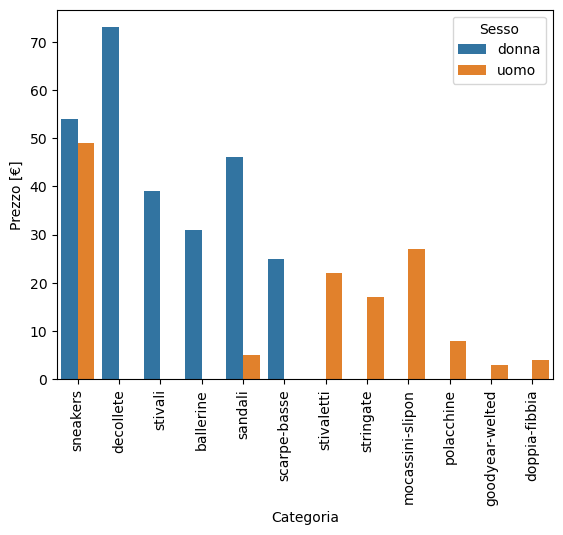

In [150]:
sns.countplot(data=df, x="Categoria", hue=df.Sesso) #, estimator="mean")
plt.ylabel("Prezzo [€]")
plt.xticks(rotation=90)

In [133]:
#I save the clean dataframe
df.to_csv("duelune_clean.csv", index=None)